In [22]:
from collections import Counter
import numpy as np

In [23]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

In [24]:
g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

In [25]:
g      = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

Note: The data in reviews.txt we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like The, the, and THE, all the same way.

# Lesson: Develop a Predictive Theory

In [26]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

In [27]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [28]:
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the ratios of word usage between positive and negative reviews.

TODO: Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in pos_neg_ratios.

Hint: the positive-to-negative ratio for a given word can be calculated with positive_counts[word] / float(negative_counts[word]+1). Notice the +1 in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [29]:
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

Examine the ratios you've calculated for a few words:

In [30]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:

Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio will be.
Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The +1 we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.
Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
When comparing absolute values it's easier to do that around zero than one.
To fix these issues, we'll convert all of our ratios to new values using logarithms.

TODO: Go through all the ratios you calculated and convert them to logarithms. (i.e. use np.log(ratio))

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [31]:
# Convert ratios to logs
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

NOTE: In the video, Andrew uses the following formulas for the previous cell:

For any postive words, convert the ratio using np.log(ratio)
#### For any negative words, convert the ratio using -np.log(1/(ratio + 0.01))
Above doesn't make sense as we only need to create opposite side of extreme positive and extreme negative.
For any negative words, convert the ratio using np.log(ratio)

These won't give you the exact same results as the simpler code we show in this notebook, but the values will be similar. In case that second equation looks strange, here's what it's doing: First, it divides one by a very small number, which will produce a larger positive number. Then, it takes the log of that, which produces numbers similar to the ones for the postive words. Finally, it negates the values by adding that minus sign up front. The results are extremely positive and extremely negative words having positive-to-negative ratios with similar magnitudes but oppositite signs, just like when we use np.log(ratio).

Examine the new ratios you've calculated for the same words from before:

In [32]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above 1, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below -1. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios.

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see all the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write reversed(pos_neg_ratios.most_common()).)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to 0, words will get more positive as their ratios approach and go above 1, and words will get more negative as their ratios approach and go below -1. That's why we decided to use the logs instead of the raw ratios.

End of Project 1.
Watch the next video to continue with Andrew's next lesson.
Transforming Text into Numbers

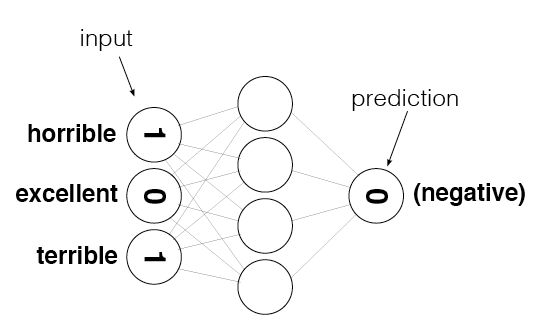

In [33]:
from IPython.display import Image
review = "This was a horrible, terrible movie."
Image(filename='sentiment_network.png')

## Project 2: Creating the Input/Output Data

In [34]:
vocab = set(total_counts.keys())

In [35]:
vocab_size = len(vocab)
print(vocab_size)

74074


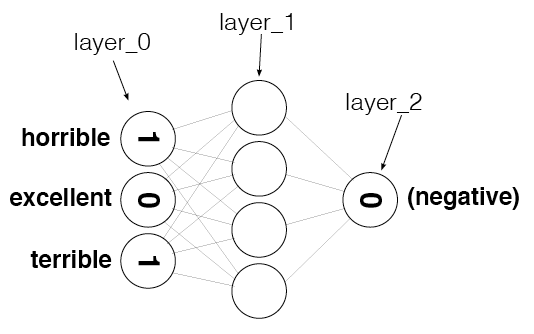

In [36]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

In [37]:
layer_0 = np.zeros((1,vocab_size))

In [38]:
layer_0.shape

(1, 74074)

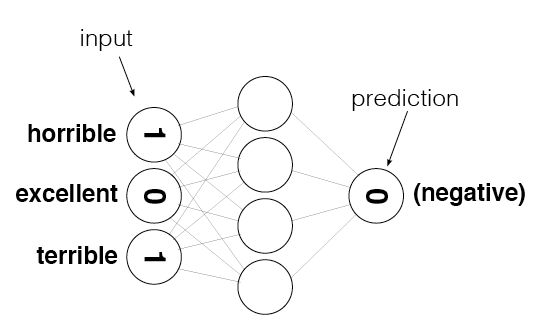

In [39]:
Image(filename='sentiment_network.png')

layer_0 contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [ ]:
# Create a dictionary of words in the vocabulary mapped to index positions 
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i

In [ ]:
# display the map of words to indices
word2index

TODO: Complete the implementation of update_input_layer. It should count how many times each word is used in the given review, and then store those counts at the appropriate indices inside layer_0.

In [ ]:
def update_input_layer(review):
    
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
     
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    
    # count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

Run the following cell to test updating the input layer with the first review. 
The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in layer_0.